## General understanding of data

In [3]:
import pandas as pd

df = pd.read_csv('datasaurus.csv')

print(df.head())
print()
print(df.sample())
print()
print(f"The shape is {df.shape}")
print()
print(df.describe())
print()
print(df.isnull().sum())

  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333

         dataset          x          y
1583  slant_down  44.300515  58.132959

The shape is (1846, 3)

                 x            y
count  1846.000000  1846.000000
mean     54.265695    47.835099
std      16.713001    26.847766
min      15.560750     0.015119
25%      41.073403    22.561073
50%      52.591269    47.594450
75%      67.277845    71.810778
max      98.288123    99.694680

dataset    0
x          0
y          0
dtype: int64


## Define Features and Targets

In [6]:
column_names = df.columns.tolist()
print(column_names)


feature_column_names = ['x', 'y']
target_column_name = 'dataset'


print(df[target_column_name].value_counts())
print()


['dataset', 'x', 'y']
dataset
dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: count, dtype: int64



## Data distribution

### Feature Distribution in Histograms

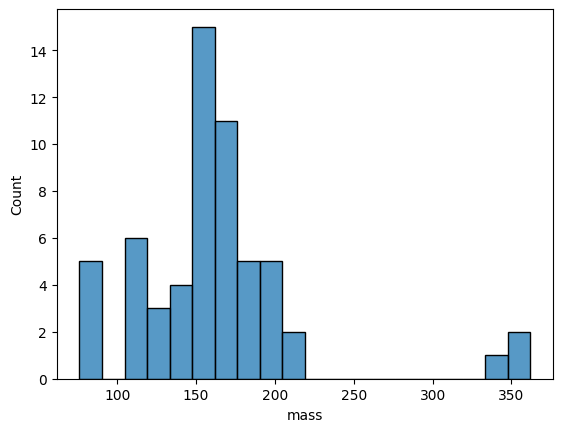

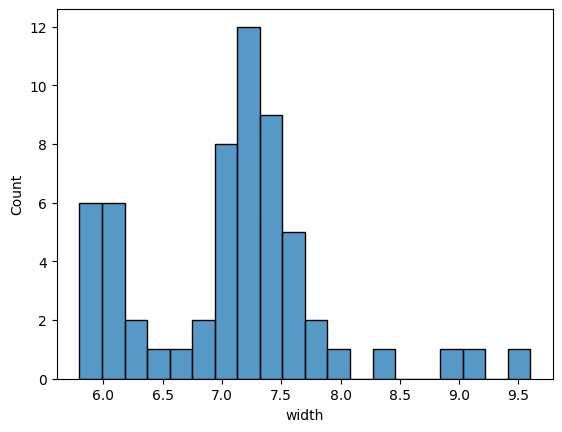

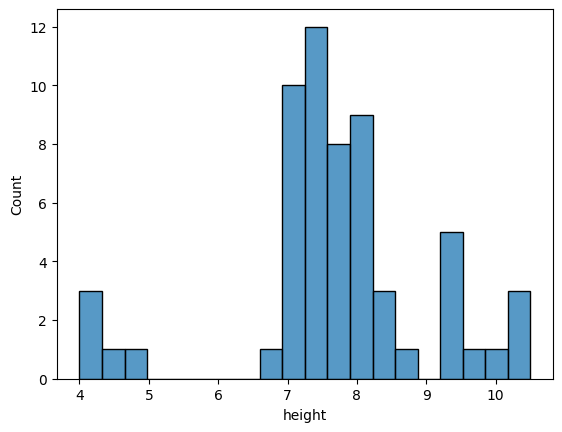

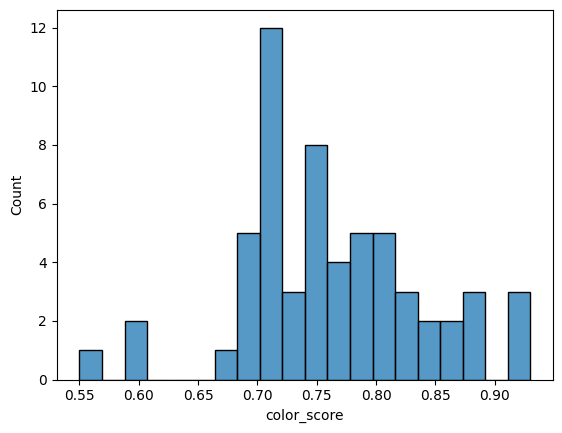

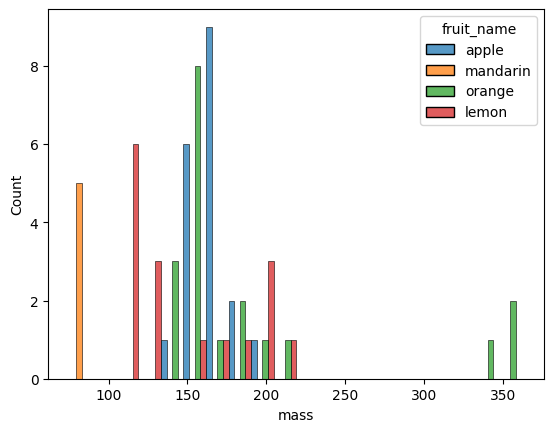

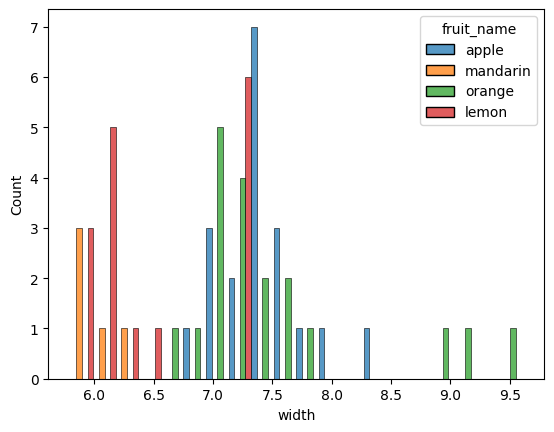

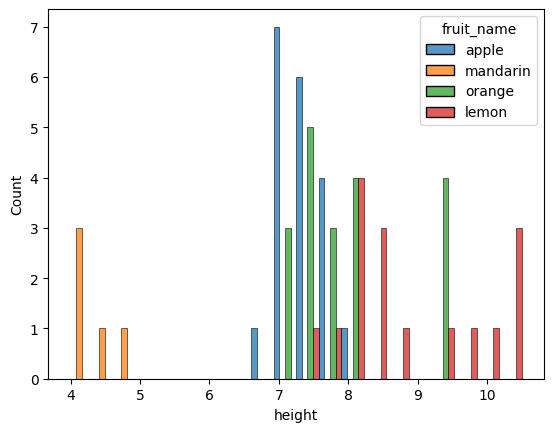

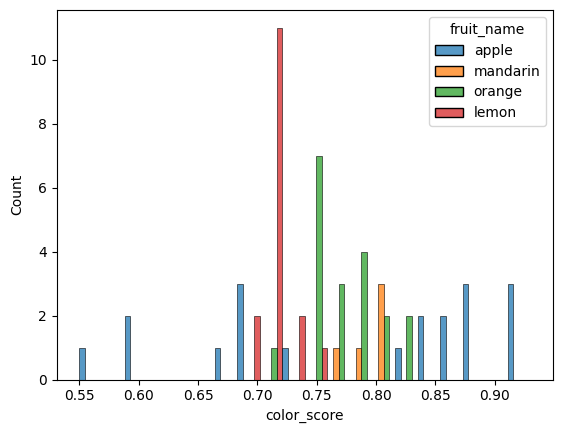

apple


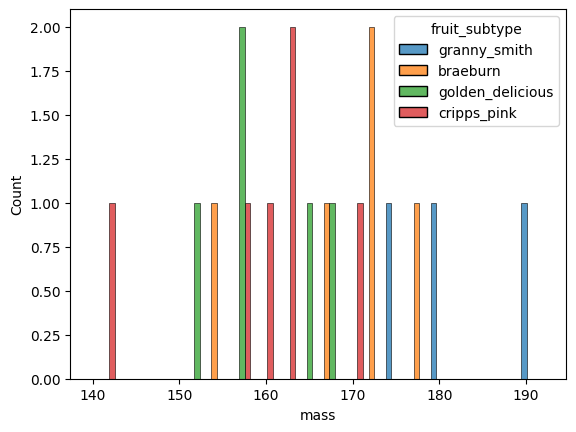

mandarin


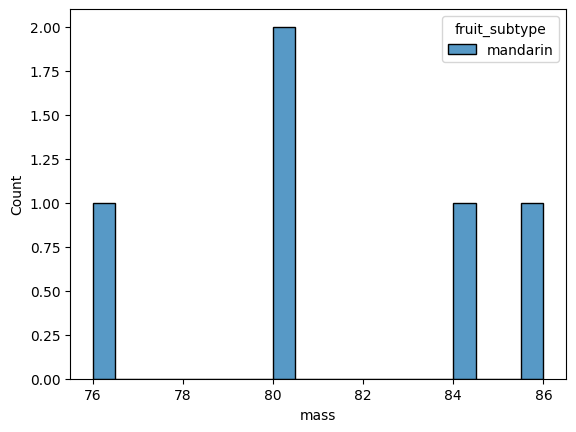

orange


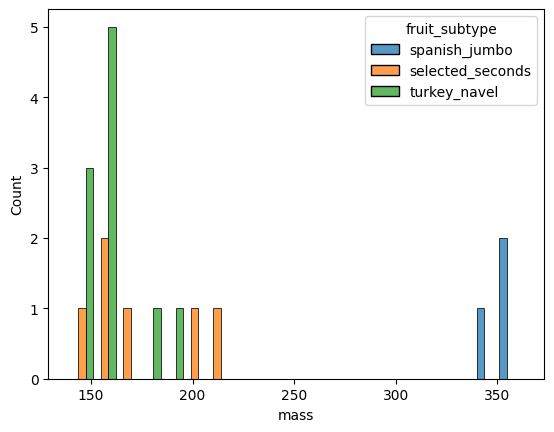

lemon


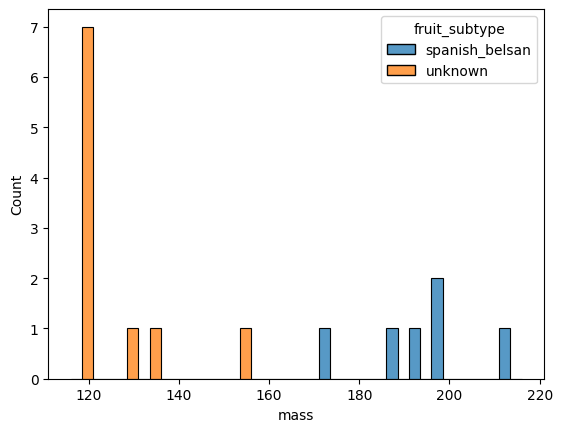

apple


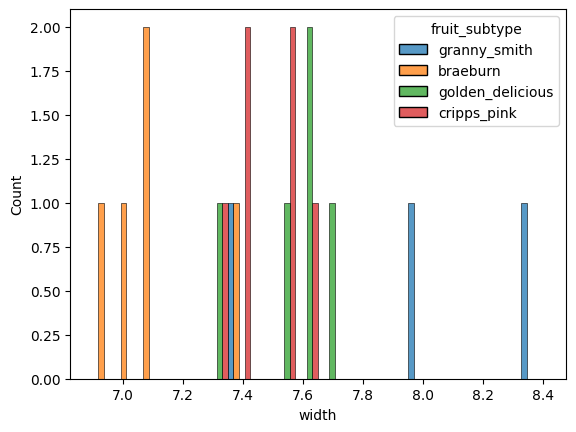

mandarin


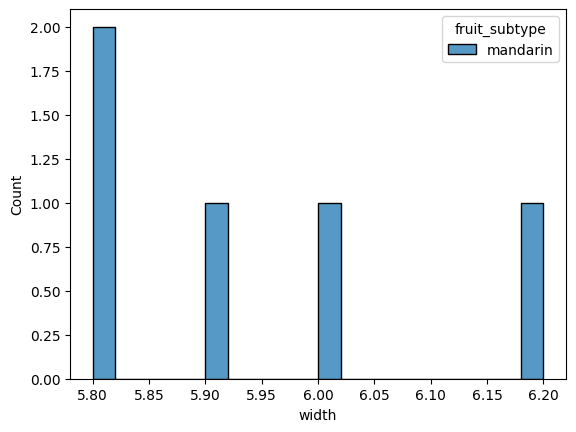

orange


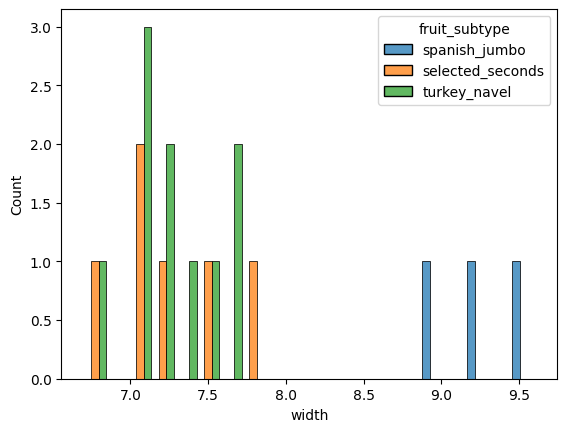

lemon


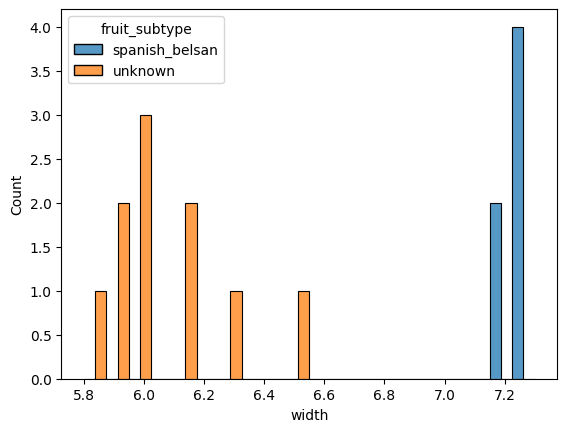

apple


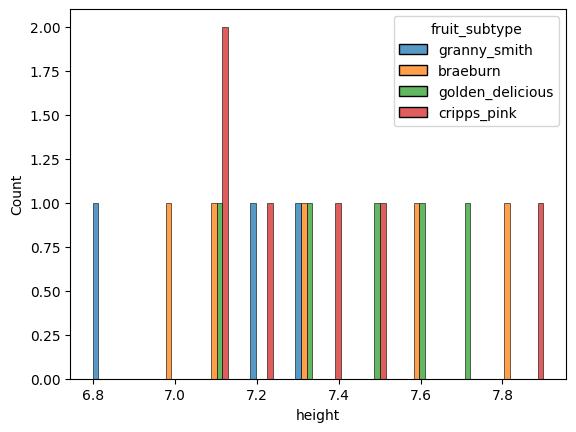

mandarin


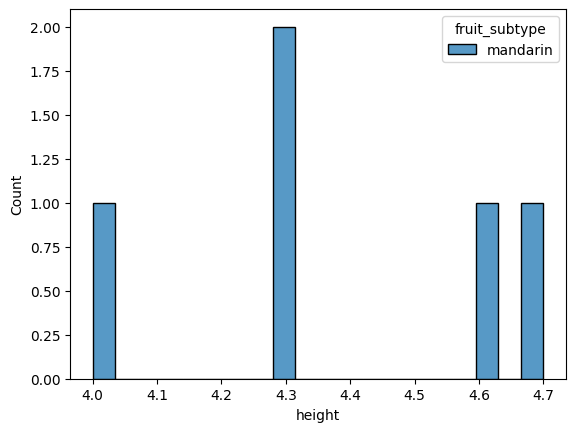

orange


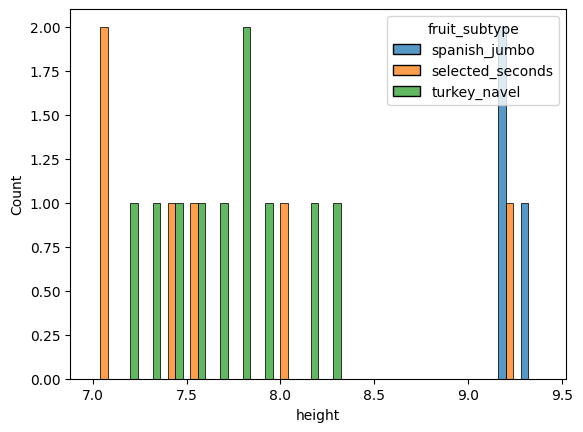

lemon


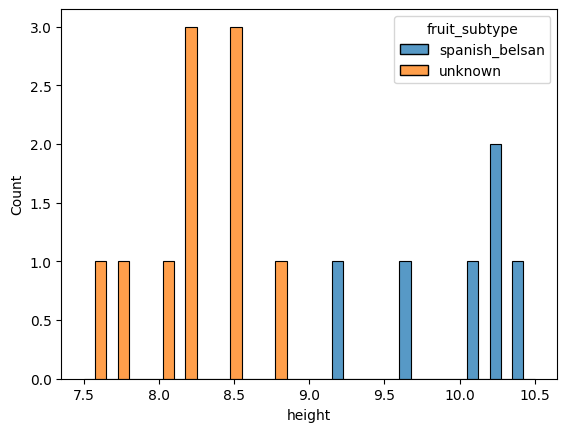

apple


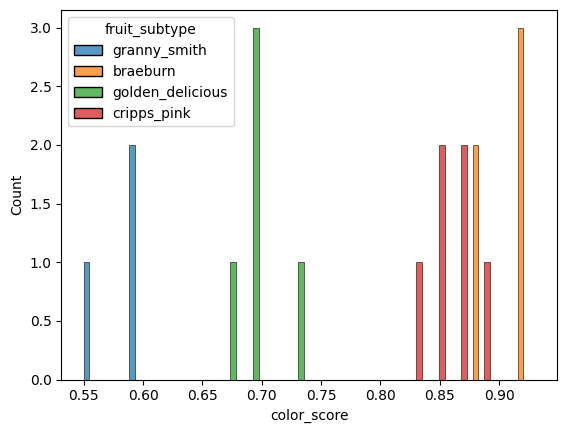

mandarin


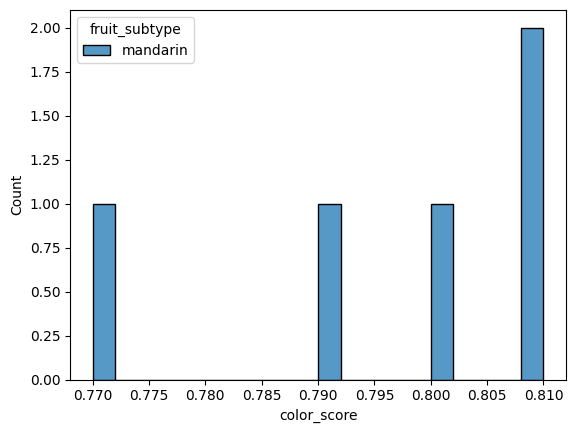

orange


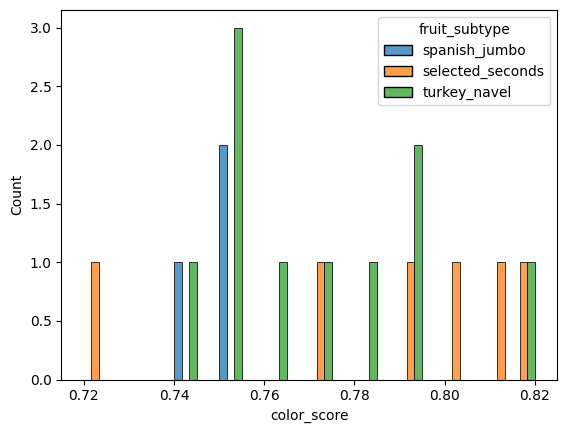

lemon


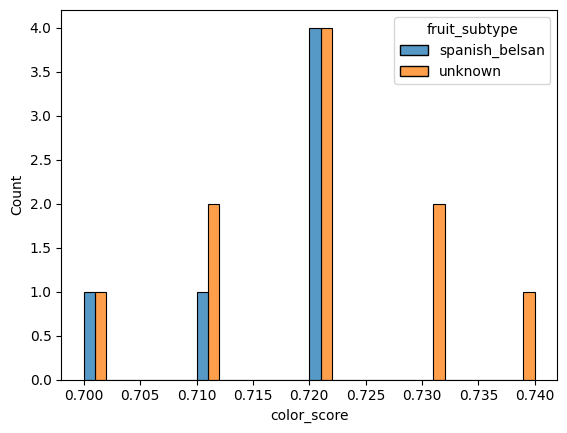

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['mass', 'width', 'height', 'color_score']

for feature in features:
    sns.histplot(df[feature],
            bins=20
            )
    plt.show()



# extract the target classes, i.e. ['apple' 'mandarin' 'orange' 'lemon']
target_classes = df['fruit_name'].unique()

# show histograms with different color per target class 
for feature in features:
    sns.histplot(df,
            x=feature, 
            bins=20,
            hue='fruit_name',
            multiple='dodge' # can be 'stack', 'layer', 'dodge', 'fill'
            )
    plt.show()

for feature in features:
    for target_class in target_classes:
        print(target_class)
        #create a subset of df only with the current target_class (i.e. fruit)
        # note the filter condition in square brackets 
        df_target_class = df[df['fruit_name'] == target_class]
        sns.histplot(df_target_class,
                x=feature, 
                bins=20,
                hue='fruit_subtype',
                multiple='dodge' # can be 'stack', 'layer', 'dodge', 'fill'
                )
        plt.show()

### Feature Distribution per Target Class in Box Plots

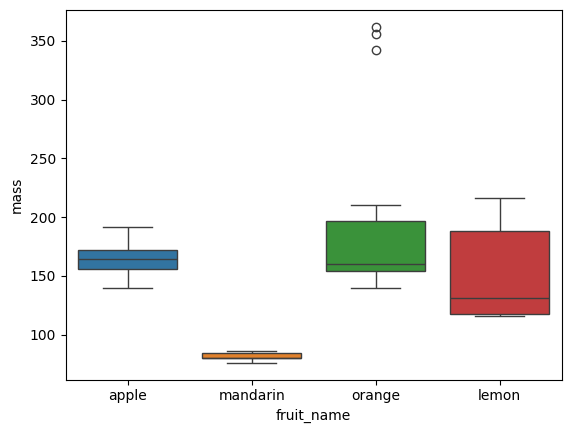

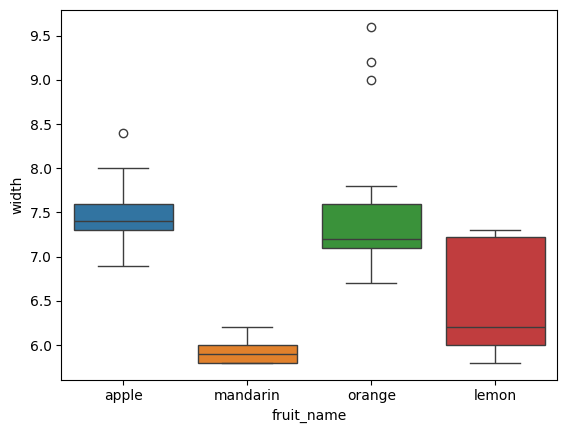

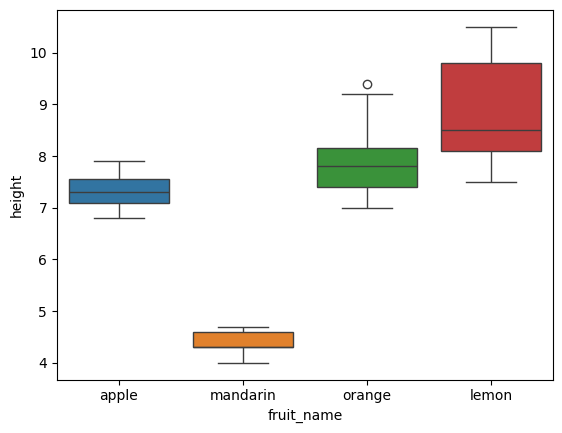

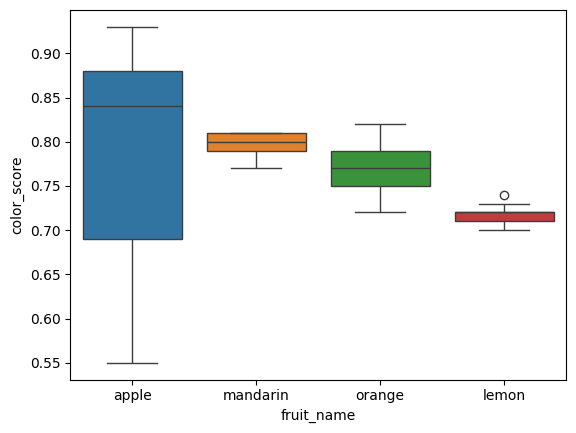

In [ ]:

for feature in features:
    sns.boxplot(x='fruit_name',
                y=feature,
                data=df,
                hue='fruit_name'
            )
    plt.show()

## Feature Relationship Analysis or Correlation Analysis

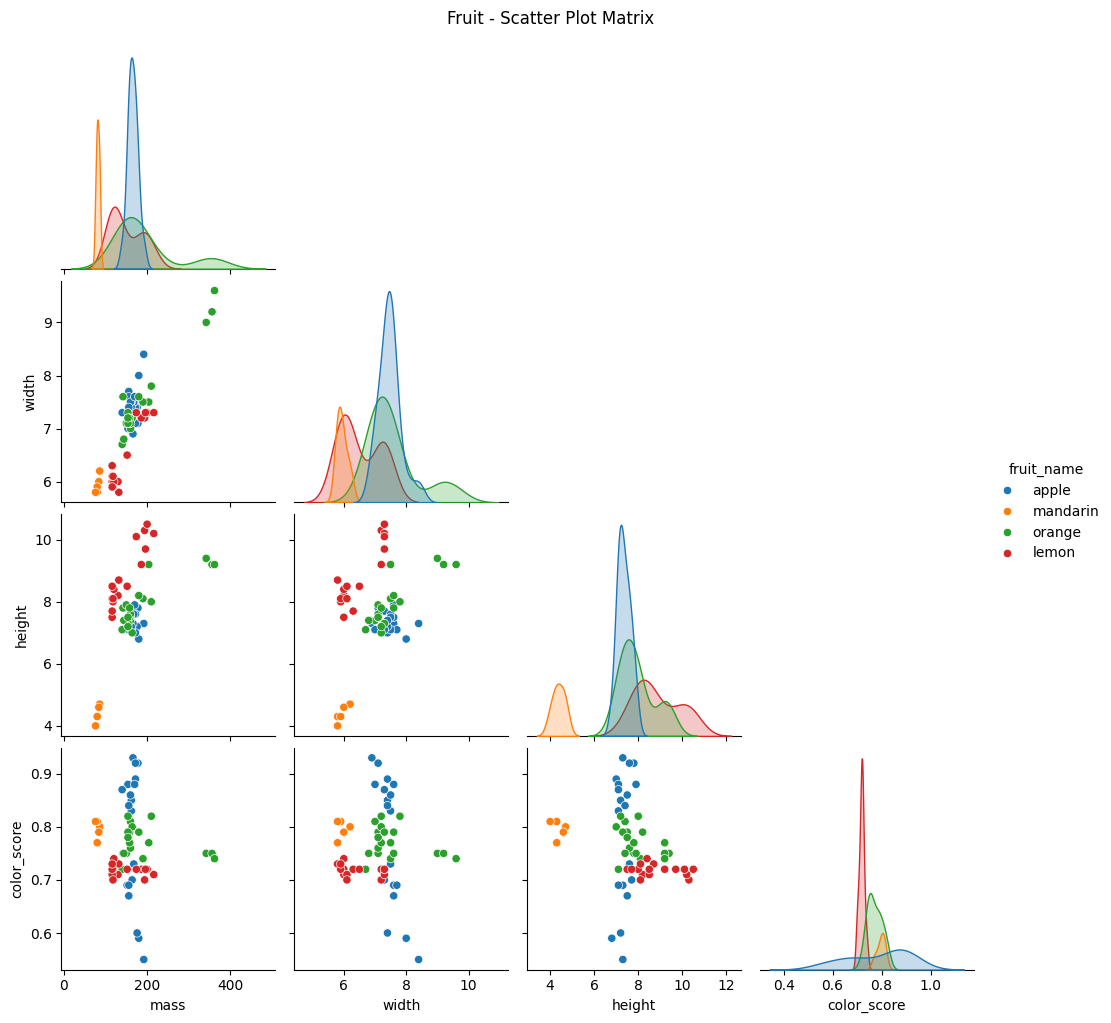

In [38]:

# drop the two target columns that we don't need for the pairplot 
# (we need only 1 target column for the color)
df_pairplot = df.drop(columns=['fruit_subtype', 'fruit_label'])

sns.pairplot(df_pairplot,
             hue='fruit_name', 
             corner=True
             )
plt.suptitle("Fruit - Scatter Plot Matrix", y=1.02)
plt.show()

### Feature Correlation Matrix

                 mass     width    height  color_score
mass         1.000000  0.877687  0.609571    -0.079794
width        0.877687  1.000000  0.396848    -0.076576
height       0.609571  0.396848  1.000000    -0.247047
color_score -0.079794 -0.076576 -0.247047     1.000000


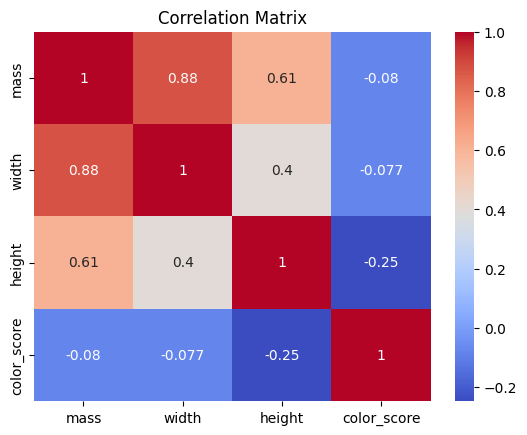

In [42]:
df_feature_columns = df[features]

corr = df_feature_columns.corr() # correlation

print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()